In [2]:
import keras

In [3]:
import matplotlib.pyplot as plt

In [4]:
(train_data,train_labels),(test_data,test_labels) = keras.datasets.mnist.load_data()

In [5]:
train_labels[3450]

4

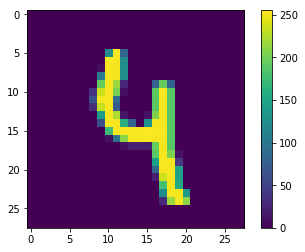

In [6]:
plt.imshow(train_data[3450])
plt.colorbar()

In [7]:
train_x = train_data.reshape(train_data.shape[0],28,28,1)
test_x  = test_data.reshape(test_data.shape[0],28,28,1)

In [8]:
train_x.shape

(60000, 28, 28, 1)

In [9]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [10]:
train_x /= 255
test_x /= 255

In [11]:
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D

In [12]:
model = keras.models.Sequential([
                            Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)),
                            MaxPooling2D(pool_size=(2,2)),
                            Flatten(),
                            Dense(128,activation='relu'),
                            Dropout(0.2),
                            Dense(10,activation='softmax')
                       ])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
cb = keras.callbacks.EarlyStopping(patience=2)

In [16]:
model.fit(train_x,train_labels,epochs=10,callbacks=[cb],validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2404 - acc: 0.9273 - val_loss: 0.0975 - val_acc: 0.9713
Epoch 2/10
48000/48000 [==============================] - 36s 759us/step - loss: 0.0990 - acc: 0.9689 - val_loss: 0.0710 - val_acc: 0.9789
Epoch 3/10
48000/48000 [==============================] - 36s 756us/step - loss: 0.0642 - acc: 0.9803 - val_loss: 0.0595 - val_acc: 0.9822
Epoch 4/10
48000/48000 [==============================] - 36s 745us/step - loss: 0.0497 - acc: 0.9844 - val_loss: 0.0610 - val_acc: 0.9826
Epoch 5/10
48000/48000 [==============================] - 36s 746us/step - loss: 0.0391 - acc: 0.9872 - val_loss: 0.0626 - val_acc: 0.9841


In [17]:
model.evaluate(test_x,test_labels)

10000/10000 [==============================] - 2s 207us/step


[0.05247537105651572, 0.9855]

In [24]:
test_labels[184]

8

In [25]:
import numpy as np
np.argmax(model.predict(test_x[184].reshape(1,28,28,1)))

8